<a href="https://colab.research.google.com/github/dongju923/NLP/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC(Natural_Language_Processing)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 수집 및 키워드 분석

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## 한국어 형태소 분석기 설치

* 한국어 자연어 처리 konlpy 라이브러리
* 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

## 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

### 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [4]:
import urllib.request

raw = urllib.request.urlopen(' https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [5]:
raw = [x.decode() for x in raw[1:]]
# 바이너리를 문자열로 디코딩

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


### 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [6]:
from konlpy.tag import Mecab
tagger = Mecab()

reviews_noun = []

for review in reviews: # revews 배열에 있는 값을 하나하나 돌면서 review에 저장하고
  for noun in tagger.nouns(review): # review 변수에 담긴 값의 명사만 추출해서 noun변수에 담음
    reviews_noun.append(noun)

reviews_noun[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

#### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [7]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데'
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '후', '이', '애', '씨', '속', '뿐', '밋', '그', '급', 'ㄷ', '데']


#### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [8]:
reviews_noun = []

for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:  # stop_words 배열에 있는 단어가 없는 것만 noun변수에 저장
      reviews_noun.append(noun)

reviews_noun[:10]

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '우리', '나라']

### 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [9]:
from collections import Counter

reviews_nouns_counter = Counter(reviews_noun)
top_reviews_nouns = dict(reviews_nouns_counter.most_common(100))
top_reviews_nouns

{'가슴': 1817,
 '가족': 1401,
 '감독': 5629,
 '감동': 6489,
 '개봉': 1248,
 '건지': 1397,
 '결말': 2066,
 '공감': 1288,
 '공포': 2048,
 '굿': 2110,
 '극장': 1290,
 '기대': 3465,
 '기분': 1241,
 '기억': 2364,
 '나라': 1409,
 '남자': 2078,
 '내용': 5731,
 '년': 4936,
 '노': 1181,
 '눈': 1484,
 '눈물': 1704,
 '느낌': 1950,
 '대박': 1495,
 '대사': 1263,
 '돈': 2980,
 '드라마': 6896,
 '때문': 2371,
 '마음': 2128,
 '마지막': 3647,
 '막장': 1149,
 '매력': 1832,
 '명작': 2685,
 '모습': 1364,
 '몰입': 1453,
 '뭔가': 1361,
 '바': 1184,
 '반전': 1868,
 '배우': 5893,
 '부분': 1246,
 '사람': 6742,
 '사랑': 4741,
 '삶': 1141,
 '생각': 6943,
 '소재': 1999,
 '수준': 1864,
 '스토리': 7163,
 '시간': 5320,
 '시리즈': 1380,
 '실망': 1557,
 '쓰레기': 4585,
 '씬': 1128,
 '아이': 1749,
 '액션': 3568,
 '어디': 1184,
 '여운': 1386,
 '여자': 2678,
 '연기': 9175,
 '연기력': 1387,
 '연출': 2376,
 '우리': 2531,
 '원작': 1705,
 '음악': 1852,
 '이건': 3650,
 '이걸': 1264,
 '이게': 3046,
 '이상': 2676,
 '이야기': 2947,
 '이해': 2745,
 '인간': 1811,
 '인생': 2060,
 '일본': 1878,
 '자체': 1558,
 '작가': 1198,
 '작품': 3985,
 '장면': 3262,
 '재미': 5479,
 '저': 1218,
 

### 단어 빈도 시각화

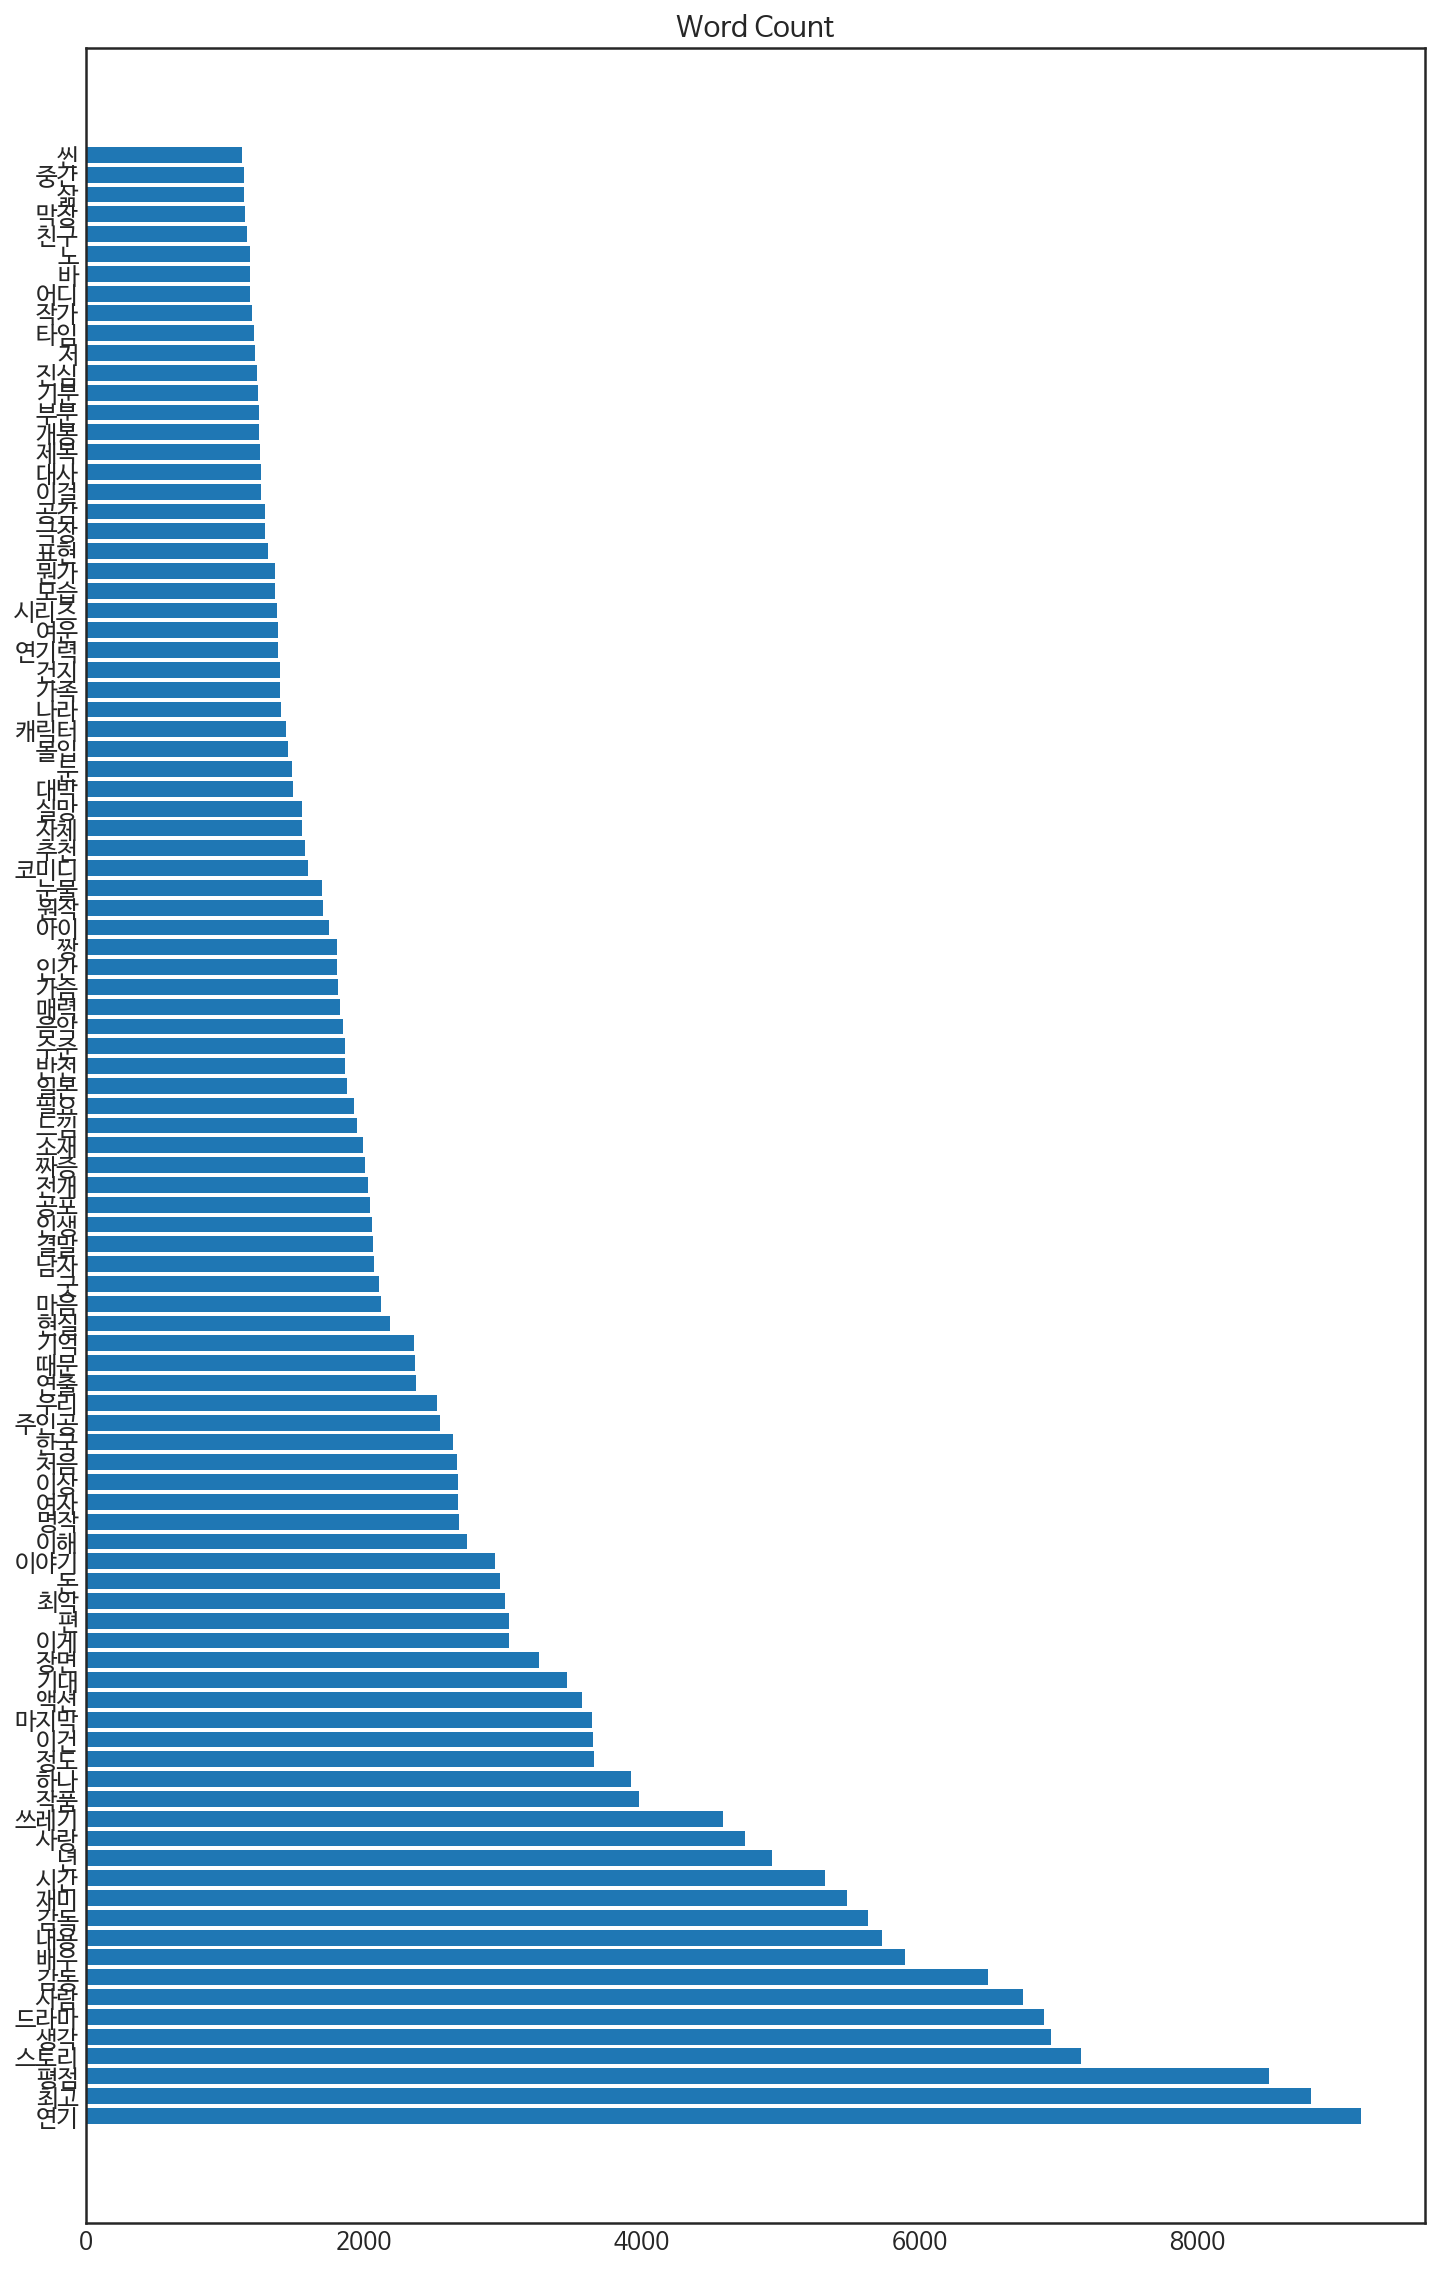

In [10]:
import numpy as np

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_reviews_nouns))

plt.figure(figsize=(12,20))
plt.barh(y_pos, top_reviews_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_reviews_nouns.keys())
plt.show()

### 트리맵(Treemap) 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [11]:
!pip install squarify

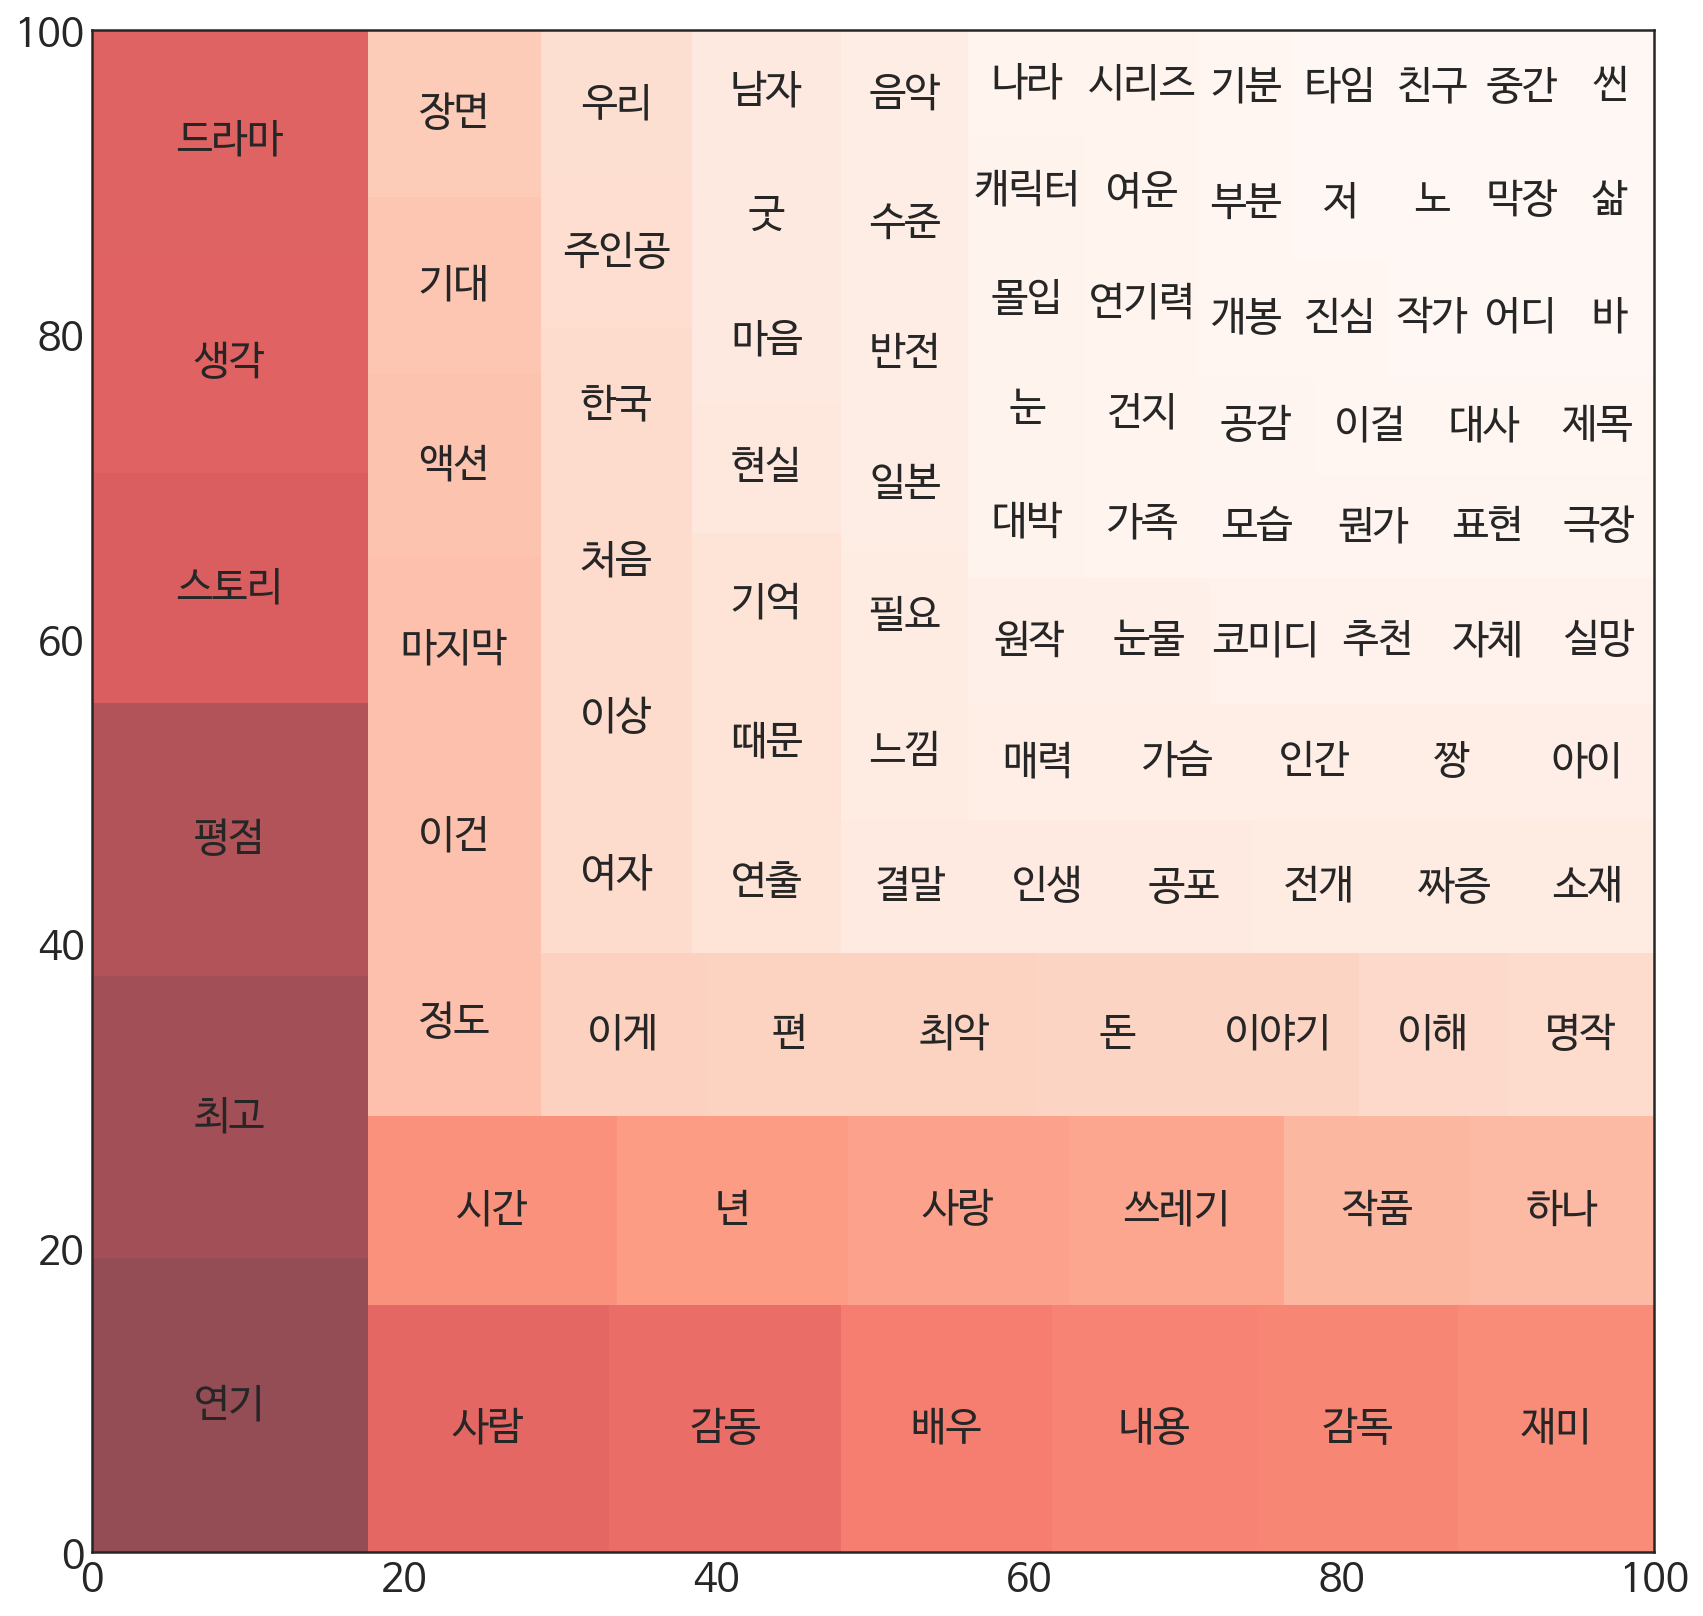

In [12]:
import squarify

plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_reviews_nouns.values()),
                            vmax=max(top_reviews_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_reviews_nouns.values()]

squarify.plot(label=top_reviews_nouns.keys(),
              sizes=top_reviews_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드(WordCloud) 시각화

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [13]:
!pip install wordcloud

* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [14]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_reviews_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

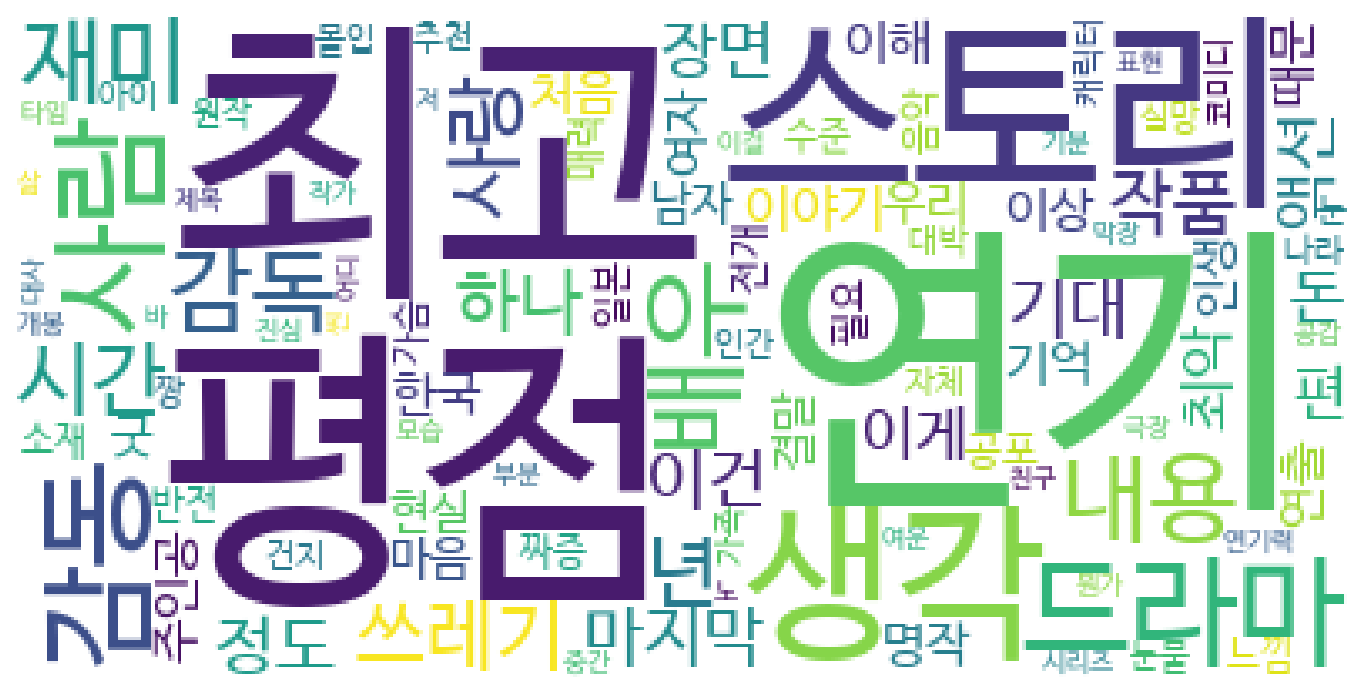

In [15]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 네이버 검색 API 서비스

### 네이버 서비스 API 신청

1. 네이버 개발자센터: https://developers.naver.com/
2. 어플리케이션 등록
3. 클라이언트 ID/SECRET 확인

### NAVER 서비스 API 종류

| 항목 | 주소                                         |
|------|----------------------------------------------|
|블로그| https://openapi.naver.com/v1/search/blog.json |
|뉴스　| https://openapi.naver.com/v1/search/news.json |
| 책　 | https://openapi.naver.com/v1/search/book.json|
| 성인 검색어 판별|　https://openapi.naver.com/v1/search/adult.json|
| 백과사전| https://openapi.naver.com/v1/search/encyc.json|
| 영화| https://openapi.naver.com/v1/search/movie.json|
| 카페글 |https://openapi.naver.com/v1/search/cafearticle.json|
| 지식in| https://openapi.naver.com/v1/search/kin.json|
| 지역 | https://openapi.naver.com/v1/search/local.json|
| 오타변환 | https://openapi.naver.com/v1/search/errata.json|
| 웹문서 | https://openapi.naver.com/v1/search/webkr.json|
| 이미지 | https://openapi.naver.com/v1/search/image.json|
| 쇼핑 | https://openapi.naver.com/v1/search/shop.json|
| 전문자료 | https://openapi.naver.com/v1/search/doc.json|

## 네이버 웹문서 키워드 분석

### 네이버 웹문서 검색 API

In [16]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

# 네이버 API키
CLIENT_ID = '_Q4aEJJSMjkPbwAwehSa'
CLIENT_SECRET = 'PcsRV_Hf6g'

# 요청 변수 선언
query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000

# DataFrame의 columns명을 출력 변수로 설정
web_df = pd.DataFrame(columns=('Title', 'Link', 'Description'))

for start_index in range(start, end, 100):  # 1부터 1000까지 100단위로
  url = f'https://openapi.naver.com/v1/search/webkr?query={str(query)}&display={str(display)}&start={str(start_index)}' # request보낼 주소
  request = urllib.request.Request(url)
  request.add_header('X-Naver-Client-id', CLIENT_ID)
  request.add_header('X-Naver-Client-secret', CLIENT_SECRET)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()  # request보내고 respone를 받을 때 코드(정상=200)

  if(rescode == 200):
    response_body = response.read() # 응답을 받아옴
    response_dict = json.loads(response_body.decode('utf-8')) # 응답을 json으로  받아서 딕셔너리 형태로 변환
    items = response_dict['items'] # 딕셔너리 내의 items이라는 키를 받아옴(items라는 키에는 title, link, description이 있음)
    for item_index in range(0, len(items)): 
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])  # items안에 있는 title저장
      link = items[item_index]['link']  # items안에 있는 link저장
      description = re.sub(remove_tag, '', items[item_index]['description'])  # items안에 있는 description저장
      web_df.loc[idx] = [title, link, description]  # dataframe에 저장
      idx += 1
  else:
    print("Error Code: " + rescode) 
web_df

검색 질의: 인공지능


,Title,Link,Description
0,인공지능 - 나무위키,https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%A7%8...,인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 인...
1,인공지능의 정의와 활용 방안 | SAS KOREA,https://www.sas.com/ko_kr/insights/analytics/w...,"SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, ..."
2,인공지능/논란 - 나무위키,https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%A7%8...,"인공지능, 특히 &quot;강인공지능&quot;이나 그것이 더욱 심화된 &quot;..."
3,강인공지능 - 나무위키,https://namu.wiki/w/%EA%B0%95%EC%9D%B8%EA%B3%B...,"Strong AI, True AI약인공지능(Weak AI)에 대비되는 의미로 만들어..."
4,교육과정 소개 - 경기도미래기술학교,https://www.jobaba.net/tech/curriculum_ai.html,"이용한 인공신경망 구현 실습 RNN, LSTM 알고리즘의 원리 이해하고 구현하기 C..."
...,...,...,...
115,인공지능 보도자료 | 중부뉴스통신,http://press.jungbunews.com/?md=A06&tno=203,"인공지능 보도자료 세미나허브, ‘자율주행 자동차 시대를 대비한 융·복합 기술 및 전..."
116,인공지능 | Daum 웹툰,https://webtoonleague.kakao.com/league/viewer/...,추천 40 Published by Kakao Entertainment 홍시 작가의 ...
117,[특허로 본 4차산업 유망기술⑦] 인공지능(AI) – IPTARGETS,https://www.iptargets.com/shop/recomended/%ED%...,자세히보기 ↓ 주요내용 주요 목차 인간 지능과 학습을 구현하는 ‘인공지능(AI)’ ...
118,인공지능 - 실전코딩 - 생활코딩 - opentutorials.org,https://www.opentutorials.org/course/4204,인공지능 2021-03-11 11:22:20 시작하기 What am i? Am i ...


In [17]:
web = []
for d in web_df.Description:
  web.append(d)

print(web[:5])

['인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 인간이 지닌 지적 능력의 일부 또는 전체, 혹은 그렇게 생각되는 능력을 인공적으로 구현한 것을 말한다.', 'SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, AI의 역사와 활용 방법에 대해서 알아 보실 수 있습니다.', '인공지능, 특히 &quot;강인공지능&quot;이나 그것이 더욱 심화된 &quot;초지능&quot;의 출현이 사회에 미칠 파장들에 대한 다양한 우려가 제기되고 있다.', 'Strong AI, True AI약인공지능(Weak AI)에 대비되는 의미로 만들어진 용어이다. 약인공지능은 어떤 특정한 한 가지 분야의 주어진 일을 인간의 지시에 따라 수행하는 인공지능을 말하는데 이러한 약인공지능의 제한된 기능을 뛰어넘어 더 발달된 인공지능이 바로 강인공지능이다.', '이용한 인공신경망 구현 실습 RNN, LSTM 알고리즘의 원리 이해하고 구현하기 CNN,VGG16, YOLO, GAN 알고리즘의 이해 Keras 기반의 YOLO, GAN 실전 구현 클라우드 환경 빅데이터를 활용한 인공지능 서비스 개발']


### 형태소 분석을 이용한 명사 추출


#### 불용어 사전

불용어 예제: `인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번`

In [18]:
stop_word = '인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번'
stop_word = stop_word.split(' ')
print(stop_word)

['인공지능', '인공', '지능', '분야', '수', '것', '등', '기반', '일', '년', '말', '문', '월', '이', '명', '깨', '개', '중', '범', '부', '딥', '빅', '책', '분', '봉', '차', '나', '내', '전', '억', '대', '형', '선', '사', '폼', '원', '번']


In [19]:
tagger = Mecab()
web_nouns = []
for w in web:
  for noun in tagger.nouns(w):
    if noun not in stop_word:
      web_nouns.append(noun)
web_nouns[:10]

['人工', '知能', '인간', '지적', '능력', '일부', '전체', '생각', '능력', '구현']

### 단어 빈도수 측정

In [20]:
web_nouns_counter = Counter(web_nouns)
top_web_nouns = dict(web_nouns_counter.most_common(100))
top_web_nouns

{'가지': 4,
 '개념': 9,
 '개발': 11,
 '고객': 6,
 '공개': 7,
 '공학': 4,
 '과정': 6,
 '과학': 4,
 '관련': 5,
 '교육': 13,
 '구축': 5,
 '구현': 9,
 '규모': 4,
 '기계': 6,
 '기본': 5,
 '기술': 40,
 '기업': 11,
 '내용': 4,
 '논의': 4,
 '뉴스': 9,
 '능력': 12,
 '대학교': 6,
 '데이터': 23,
 '디지털': 5,
 '러닝': 7,
 '로그인': 4,
 '로봇': 6,
 '머신': 5,
 '모델': 8,
 '문제': 8,
 '미래': 9,
 '발전': 7,
 '번역': 5,
 '법': 5,
 '분석': 14,
 '사용': 6,
 '사항': 4,
 '사회': 7,
 '산업': 8,
 '상담': 6,
 '서비스': 13,
 '세계': 4,
 '세탁': 4,
 '소개': 7,
 '소식': 4,
 '소프트웨어': 7,
 '솔루션': 4,
 '수학': 4,
 '스타트업': 4,
 '습득': 4,
 '시간': 4,
 '시스템': 9,
 '시작': 4,
 '시장': 8,
 '신경망': 7,
 '안내': 5,
 '알고리즘': 4,
 '약': 4,
 '언어': 5,
 '연구': 10,
 '영상': 5,
 '예측': 4,
 '온라인': 5,
 '우리': 5,
 '융합': 5,
 '응용': 6,
 '이론': 6,
 '이번': 5,
 '이용': 5,
 '이해': 7,
 '인간': 28,
 '인식': 4,
 '인프라': 4,
 '자율': 4,
 '전공': 6,
 '전자': 5,
 '전체': 5,
 '정보': 12,
 '정의': 4,
 '제품': 8,
 '주요': 5,
 '주제': 4,
 '지': 4,
 '지식': 12,
 '지원': 7,
 '진행': 4,
 '창의': 6,
 '처리': 8,
 '최신': 6,
 '추론': 4,
 '컴퓨터': 9,
 '학과': 6,
 '학습': 16,
 '한국': 4,
 '행동': 4,
 '현대': 4,
 '협회': 4,
 '

### 단어 빈도 시각화

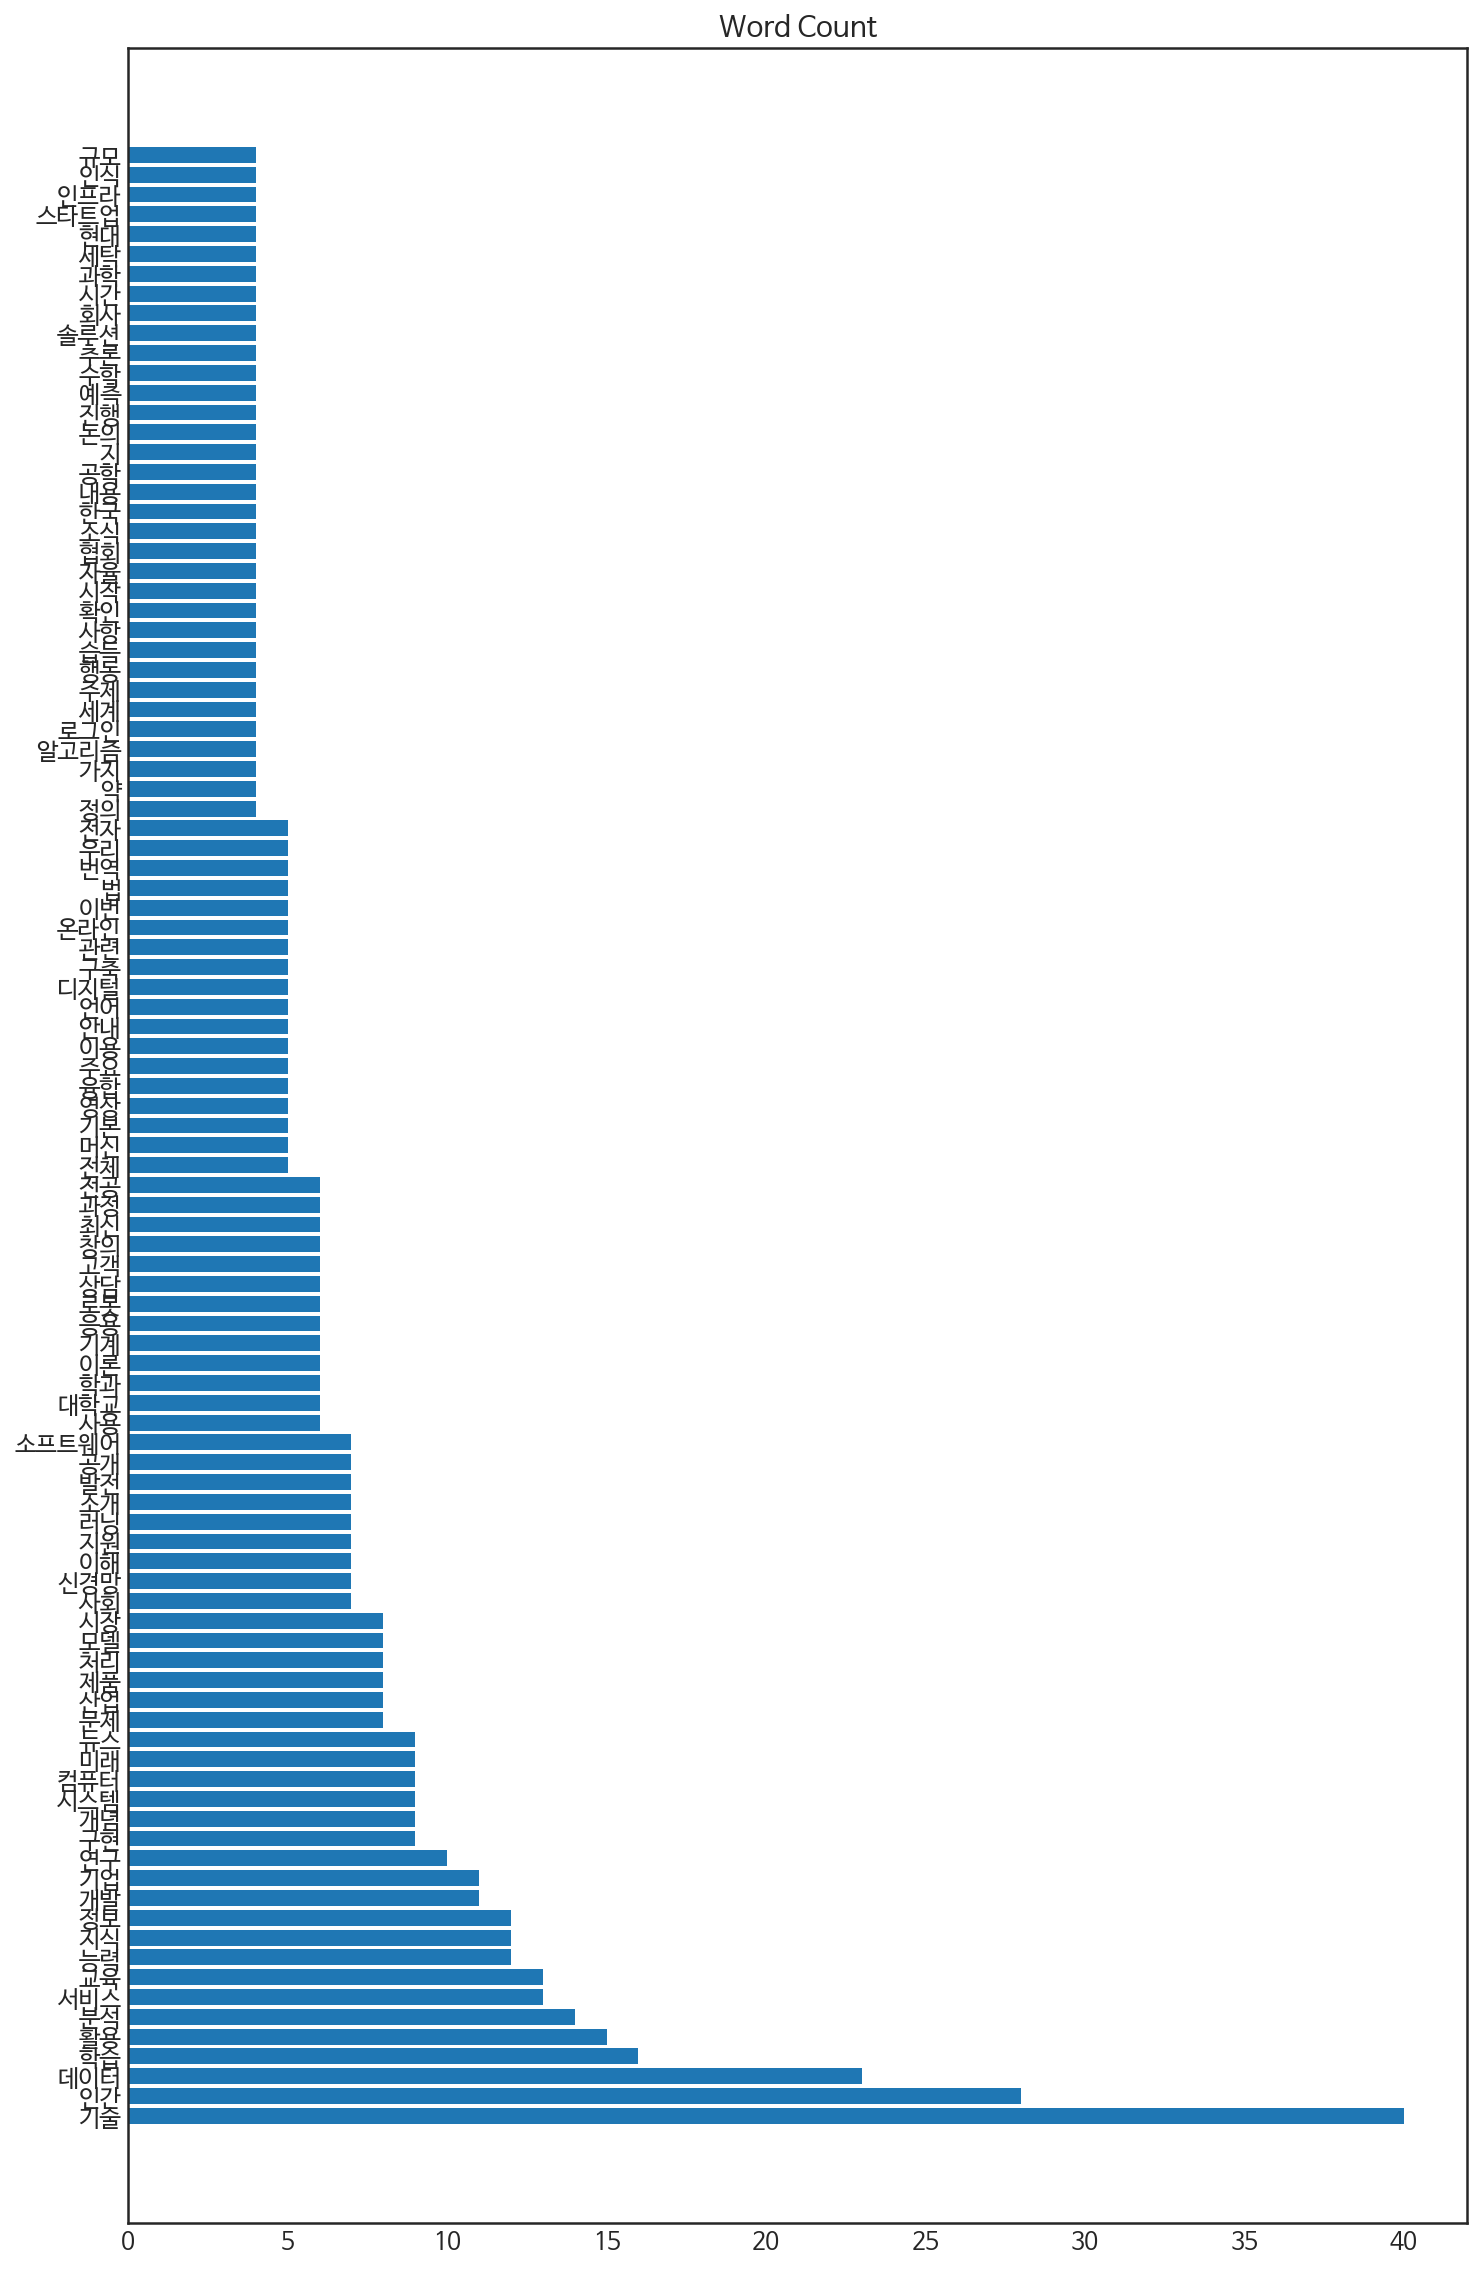

In [21]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_web_nouns))

plt.figure(figsize=(12,20))
plt.barh(y_pos, top_web_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_web_nouns.keys())
plt.show()

### 트리맵 시각화

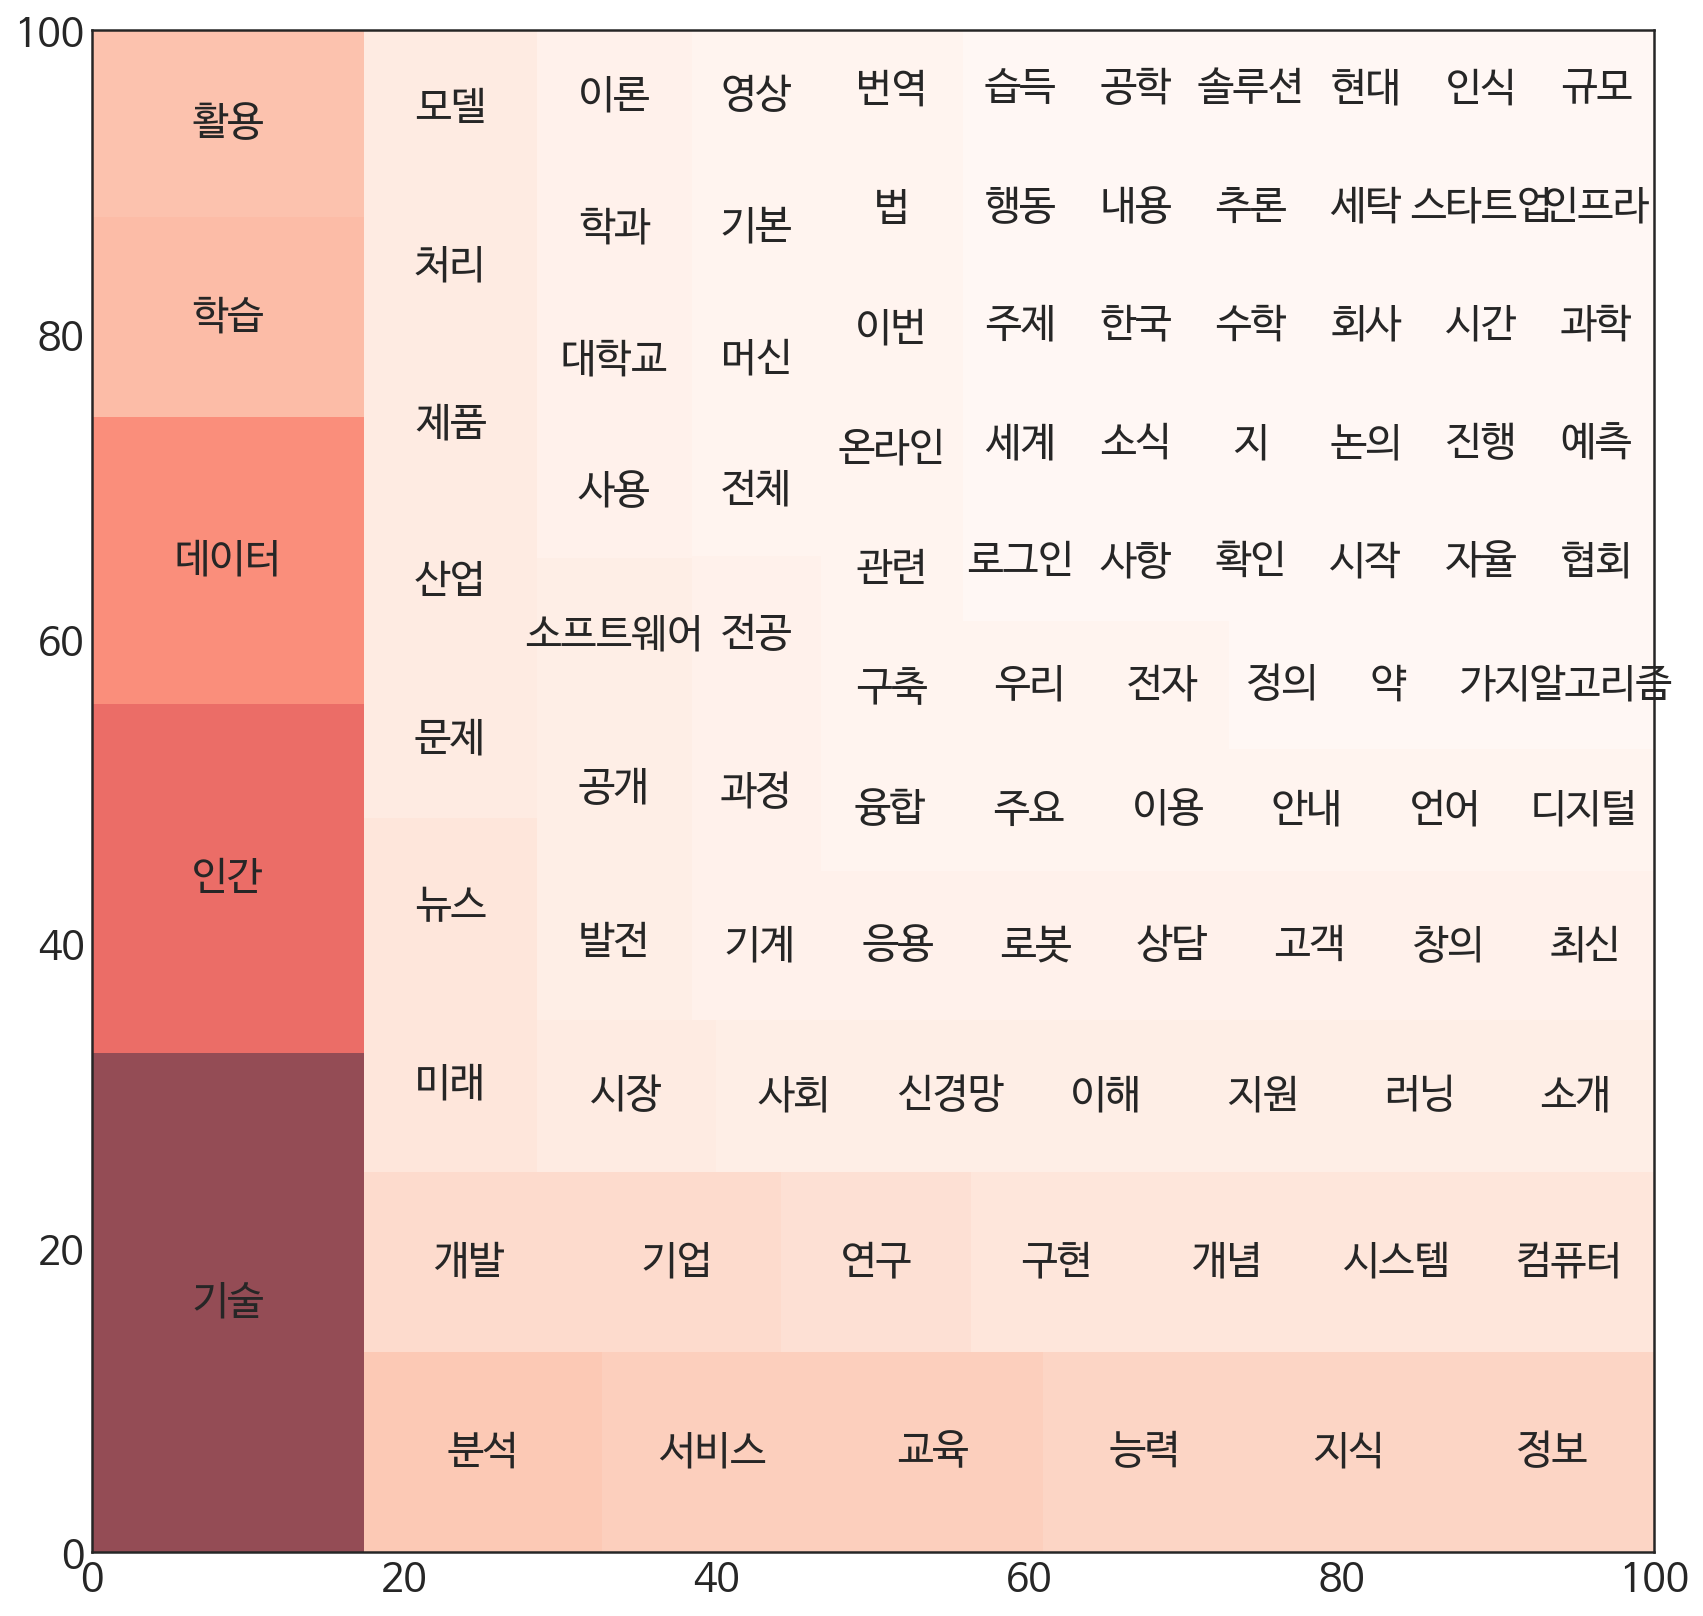

In [22]:
import squarify

plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_web_nouns.values()),
                            vmax=max(top_web_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_web_nouns.values()]

squarify.plot(label=top_web_nouns.keys(),
              sizes=top_web_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

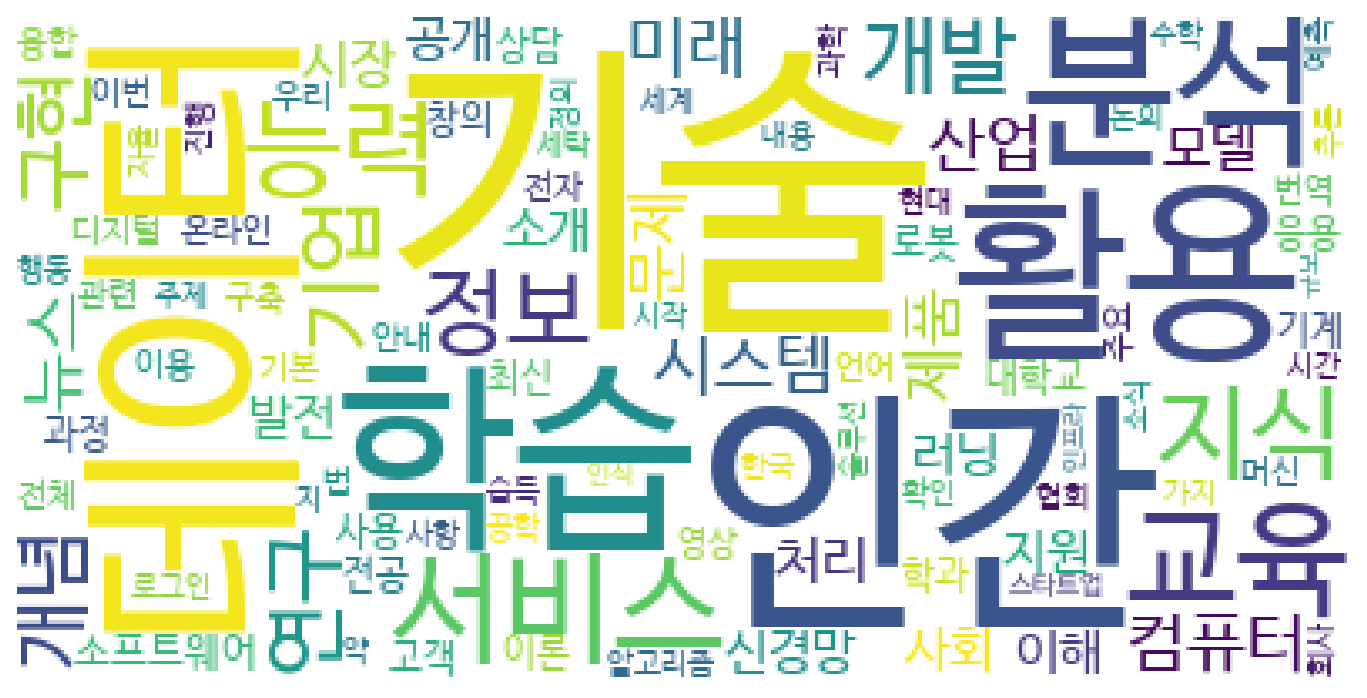

In [23]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_web_nouns)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 네이버 뉴스 키워드 분석

### 네이버 뉴스 검색 API

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

# 네이버 API키
CLIENT_ID = '_Q4aEJJSMjkPbwAwehSa'
CLIENT_SECRET = 'PcsRV_Hf6g'

# 요청 변수 선언
query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

# DataFrame의 columns명을 출력 변수로 설정
news_df = pd.DataFrame(columns=('Title', 'Original Link', 'Link', 'Description', 'Publication Date'))

for start_index in range(start, end, 100):  # 1부터 1000까지 100단위로
  url = f'https://openapi.naver.com/v1/search/news?query={str(query)}&display={str(display)}&start={str(start_index)}&sort={sort}' # request보낼 주소
  request = urllib.request.Request(url)
  request.add_header('X-Naver-Client-id', CLIENT_ID)
  request.add_header('X-Naver-Client-secret', CLIENT_SECRET)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()  # request보내고 respone를 받을 때 코드(정상=200)

  if(rescode == 200):
    response_body = response.read() # 응답을 받아옴
    response_dict = json.loads(response_body.decode('utf-8')) # 응답을 json으로  받아서 딕셔너리 형태로 변환
    items = response_dict['items'] # 딕셔너리 내의 items이라는 키를 받아옴(items라는 키에는 title, link, description이 있음)
    for item_index in range(0, len(items)): 
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])  # items안에 있는 title저장
      original_link = items[item_index]['originallink']  # items안에 있는 originallink저장
      link = items[item_index]['link']  # items안에 있는 link저장
      description = re.sub(remove_tag, '', items[item_index]['description'])  # items안에 있는 description저장
      publication_date = items[item_index]['pubDate']  # items안에 있는 pubDate저장
      news_df.loc[idx] = [title, original_link, link, description, publication_date]  # dataframe에 저장
      idx += 1
  else:
    print("Error Code: " + rescode) 
news_df

In [ ]:
news = []
for n in news_df.Title:
  news.append(n)

print(news[:5])

### 형태소 분석을 이용한 명사 추출


In [ ]:
tagger = Mecab()
news_nouns = []
for n in news:
  for noun in tagger.nouns(n):
    if noun not in stop_word:
      news_nouns.append(noun)
news_nouns[:10]

### 단어 빈도수 측정

In [ ]:
news_nouns_counter = Counter(news_nouns)
top_news_nouns = dict(news_nouns_counter.most_common(100))
top_news_nouns

### 단어 빈도 시각화

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_news_nouns))

plt.figure(figsize=(12,20))
plt.barh(y_pos, top_news_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_news_nouns.keys())
plt.show()

### 트리맵 시각화

In [ ]:
import squarify

plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_news_nouns.values()),
                            vmax=max(top_news_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_news_nouns.values()]

squarify.plot(label=top_news_nouns.keys(),
              sizes=top_news_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

In [ ]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_news_nouns)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 네이버 블로그 키워드 분석

### 네이버 블로그 검색 API

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

# 네이버 API키
CLIENT_ID = '_Q4aEJJSMjkPbwAwehSa'
CLIENT_SECRET = 'PcsRV_Hf6g'

# 요청 변수 선언
query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

# DataFrame의 columns명을 출력 변수로 설정
blog_df = pd.DataFrame(columns=('Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link'))

for start_index in range(start, end, 100):  # 1부터 1000까지 100단위로
  url = f'https://openapi.naver.com/v1/search/blog?query={str(query)}&display={str(display)}&start={str(start_index)}&sort={sort}' # request보낼 주소
  request = urllib.request.Request(url)
  request.add_header('X-Naver-Client-id', CLIENT_ID)
  request.add_header('X-Naver-Client-secret', CLIENT_SECRET)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()  # request보내고 respone를 받을 때 코드(정상=200)

  if(rescode == 200):
    response_body = response.read() # 응답을 받아옴
    response_dict = json.loads(response_body.decode('utf-8')) # 응답을 json으로  받아서 딕셔너리 형태로 변환
    items = response_dict['items'] # 딕셔너리 내의 items이라는 키를 받아옴(items라는 키에는 title, link, description이 있음)
    for item_index in range(0, len(items)): 
      remove_tag = re.compile('<.*?>')
      title = re.sub(remove_tag, '', items[item_index]['title'])  # items안에 있는 title저장
      link = items[item_index]['link']  # items안에 있는 link저장
      description = re.sub(remove_tag, '', items[item_index]['description'])  # items안에 있는 description저장
      blogger_name = items[item_index]['bloggername']  # items안에 있는 bloggername저장
      blogger_link = items[item_index]['bloggerlink']  # items안에 있는 bloggerlink저장
      blog_df.loc[idx] = [title, link, description, blogger_name, blogger_link]  # dataframe에 저장
      idx += 1
  else:
    print("Error Code: " + rescode) 
blog_df

In [33]:
blog = []
for n in blog_df.Description:
  blog.append(n)

print(blog[:5])

['2019년부터 2020년까지 2년여에 걸쳐 ▲중증도 분류 ▲구급일지 자동작성 지원 ▲최적 이송 병원 선정 지원 등 8가지 지능형 응급의료서비스 개발에 성공했습니다. 인공지능 구급차에서 응급의료시스템을 점검... ', '인공적으로 특정 바이러스에 대한 항체를 합성하기 위해서는 수백만 가지 조합의 단백질 복합체를 생성하고 분석해야 한다. 따라서 정확한 표본을 찾는 데에 많은 시간이 소요된다. 이퀴덕 인공지능... ', 'AI인공지능 가이드라인 이젠 시대가 변했습니다. 아우 어린 유아부터 노년층까지 누구나 스마트폰을... 새로운 인공지능이 모든 걸 지배하는 세상에 살고 있습니다. 우리는 돈을 투자할 때 언제 무엇을 얼마나... ', '기업 개요 모아데이타는 인공지능(AI) 기술을 활용해 이상징후를 탐지하고 예측하는 솔루션을... 포캐스터(Forecaster)는 예측·예보 인공지능을 뜻한다. 기계는 스스로 상태 이상을 감지할 수 없기 때문에... ', '모아데이타는 인공지능(AI) 기술을 활용하여 이상 탐지 및 예측 솔루션 제품을 개발하는 기업입니다. 회사와 사업의 내용 등 보다 자세한 내용은 글 하단에 첨부한 공모주의 투자설명서를 참고하시기... ']


### 형태소 분석을 이용한 명사 추출


In [44]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_word:
      blog_nouns.append(noun)
blog_nouns[:10]

['중증', '분류', '구급', '자동', '작성', '지원', '최적', '이송', '병원', '선정']

### 단어 빈도수 측정

In [ ]:
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

### 단어 빈도 시각화

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,20))
plt.barh(y_pos, top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_blog_nouns.keys())
plt.show()

### 트리맵 시각화

In [ ]:
import squarify

plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_blog_nouns.values()),
                            vmax=max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label=top_blog_nouns.keys(),
              sizes=top_blog_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

In [ ]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()